<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [4]:
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])
example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [5]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [10]:
import numpy as np

np.random.normal(10,2)

10.413863405508899

In [11]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
#   time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4 * 60, 3 * 60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
#   time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5 * 60, 2 * 60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=True, time_on_site=717.3441432687173, mobile=False),
 User(purchased=False, time_on_site=473.8039428980617, mobile=True),
 User(purchased=True, time_on_site=413.45257375644877, mobile=True),
 User(purchased=True, time_on_site=676.2315816421963, mobile=False),
 User(purchased=True, time_on_site=291.75712940178494, mobile=True),
 User(purchased=False, time_on_site=392.9850385837083, mobile=True),
 User(purchased=True, time_on_site=345.47678052373635, mobile=False),
 User(purchased=True, time_on_site=482.0510506096051, mobile=True),
 User(purchased=False, time_on_site=886.3463477947229, mobile=False),
 User(purchased=True, time_on_site=413.12544000077327, mobile=True)]

In [23]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,717.344143,False
1,False,473.803943,True
2,True,413.452574,True
3,True,676.231582,False
4,True,291.757129,True


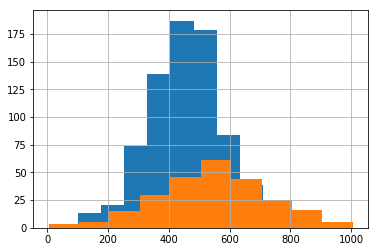

In [27]:
# user_data.time_on_site.hist();

# df[(df['price'] <=550000) & (df['num_bathrooms'] > 1 ) & (df['age'] < 20)]

mobile_user_data = user_data[(user_data['mobile'] == True)]
desk_user_data = user_data[(user_data['mobile'] == False)]

mobile_user_data.time_on_site.hist();
desk_user_data.time_on_site.hist();

user_data['time_on_site_min'] = user_data['time_on_site'] / 60



In [0]:
import matplotlib.pyplot as plt

# user_data.groupby('mobile').time_on_site  ***look at the lecture it is 8:56 PM***
# user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figure)

In [25]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,4.829529646724382,27.160388926204746,94.42771828002742,101.02011534190507,119.93869060128543,133.31539546259967,138.7938918447707,138.90506223304845,143.70760003885255,146.04427064695568,147.16695049058632,147.73302997455647,151.6246092891809,162.8218814988266,164.20070476192217,169.3031289730825,169.48054525329286,173.5393760625227,178.41870981580968,179.44082695967,181.7951205895833,183.92632136155225,184.78529744274448,197.49696964625844,203.61705472048652,204.69012567726253,211.90064360493523,211.94233495875164,212.05982583338223,213.47065716443558,219.37327325582865,220.9078434202711,221.05022667923316,221.64723044768004,226.63870587682572,232.24670488783292,232.41019810378214,232.61483562630085,235.7405825664871,236.02764545573712,...,747.5915645661912,750.2269421492504,753.2318405664051,753.5165252439766,755.6033352606614,756.2347867439275,760.0630432496724,761.5389459249391,762.0482585808941,764.7216265576069,766.0866076080292,768.6868261876689,769.1051171451709,785.734285886511,791.1568965857437,798.3023740711653,800.0551604959659,807.4913358162405,810.1457884902542,810.296208843553,812.6818065981329,816.6248076757879,818.2753579160709,818.4595081984953,818.8376198964381,819.6788657104514,823.131823525108,830.7047304571588,832.2050232349976,833.5826036972182,844.5510760020095,849.244717422047,862.1257996499633,869.9397091430327,886.3463477947229,928.8973074237954,942.9133928266253,945.7210655185553,986.6570285880217,1005.2539307891535
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
True,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,...,1,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1


In [30]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.0638, 3.415]",0.042453,0.013889
"(3.415, 6.75]",0.304245,0.248264
"(6.75, 10.085]",0.542453,0.522569
"(10.085, 13.419]",0.096698,0.185764
"(13.419, 16.754]",0.014151,0.029514


In [32]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(0.0638, 3.415]",0.042453,0.013889
"(3.415, 6.75]",0.304245,0.248264
"(6.75, 10.085]",0.542453,0.522569
"(10.085, 13.419]",0.096698,0.185764
"(13.419, 16.754]",0.014151,0.029514


In [33]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.524,0.390667
True,0.476,0.609333


In [36]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
# pd.crosstab(time_bins, user_data['purchased'], user_data['mobile'], normalize='columns') My attempt
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(0.0638, 3.415]   0.045802  0.040956  0.016807  0.013129
(3.415, 6.75]     0.213740  0.344710  0.142857  0.275711
(6.75, 10.085]    0.503817  0.559727  0.344538  0.568928
(10.085, 13.419]  0.190840  0.054608  0.369748  0.137856
(13.419, 16.754]  0.045802  0.000000  0.126050  0.004376

# Stanford Open Police Project

In [42]:
!unzip tr137st9964_ca_anaheim_2019_02_25.csv.zip
!ls

Archive:  tr137st9964_ca_anaheim_2019_02_25.csv.zip
  inflating: share/data/opp-for-archive/ca_anaheim_2019_02_25.csv  
sample_data  share  tr137st9964_ca_anaheim_2019_02_25.csv.zip


In [43]:
%%time
df = pd.read_csv('./share/data/opp-for-archive/ca_anaheim_2019_02_25.csv')


CPU times: user 87 ms, sys: 19 ms, total: 106 ms
Wall time: 108 ms


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

link = 'https://raw.githubusercontent.com/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(link)


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)